Importing all the required packages for training,testing and predicting.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

For adding training data to the csv file

In [ ]:
def add(att,health,hobbies,course,imarks,pmarks,performance):
    data=[att,health,hobbies,course,imarks,pmarks,performance]
    with open('student_data.csv', 'a', encoding='UTF8', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(data)
        print("Data entry successful")

Training and Testing of random forest model

In [ ]:
def random_forest(data):
    X = data.drop(["performance"], axis=1)
    y = data["performance"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual Performance")
    plt.ylabel("Predicted Performance")
    plt.title("Actual vs. Predicted Performance Random Forest")
    plt.show()
    return mse

Predicting using random forest on unseen data

In [ ]:
def random_forest_predict(data,att,health,hobbies,course,imarks,pmarks):
    X = data.drop(["performance"], axis=1)
    y = data["performance"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    user_input = {
    "attendance": att,
    "health": health,
    "hobbies": hobbies,
    "other courses": course,
    "internal_marks": imarks,
    "previous_marks": pmarks
    }
    user_df = pd.DataFrame(user_input, index=[0])
    user_pred = model.predict(user_df)
    print("Predicted Performance(Random Forest):", user_pred[0])

Training and Testing of gradient boosting model

In [ ]:
def gradient_boosting(data):
    X = data.drop(["performance"], axis=1).values
    y = data["performance"].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = GradientBoostingRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual Performance")
    plt.ylabel("Predicted Performance")
    plt.title("Actual vs. Predicted Performance Gradient Boosting")
    plt.show()
    return mse

Predicting using gradient boosting on unseen data

In [ ]:
def gradient_boosting_predict(data,att,health,hobbies,course,imarks,pmarks):
    X = data.drop(["performance"], axis=1).values
    y = data["performance"].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = GradientBoostingRegressor()
    model.fit(X_train, y_train)
    input_data = np.array([[att, health, hobbies, course, imarks, pmarks]])
    predicted_performance = model.predict(input_data)
    print("Predicted Performance(Gradient Boosting): {:.2f}".format(predicted_performance[0]))

Training and Testing of gaussian navie bayes model

In [ ]:
def gaussian_navie_bayes(data):
    X = data.drop(["performance"], axis=1).values
    y = data["performance"].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = GaussianNB()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual Performance")
    plt.ylabel("Predicted Performance")
    plt.title("Actual vs. Predicted Performance Gaussian Navie Bayes")
    plt.show()
    return mse

Predicting using gaussian navie bayes on unseen data

In [ ]:
def gaussian_navie_bayes_predict(data,att,health,hobbies,course,imarks,pmarks):
    X = data.drop(["performance"], axis=1).values
    y = data["performance"].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = GaussianNB()
    model.fit(X_train, y_train)
    input_data = np.array([[att, health, hobbies, course, imarks, pmarks]])
    predicted_performance = model.predict(input_data)
    print("Predicted Performance(Gaussian Navie Bayes): {:.2f}".format(predicted_performance[0]))

Main Logic

Enter attendance percentage: 90
Enter health value (0-2): 1
Enter hobbies in hours: 3
Enter extra courses taken: 3
Enter internal marks out of 100: 96
Enter previous marks out of 100: 90
1:To Predict,2:To Train Model1


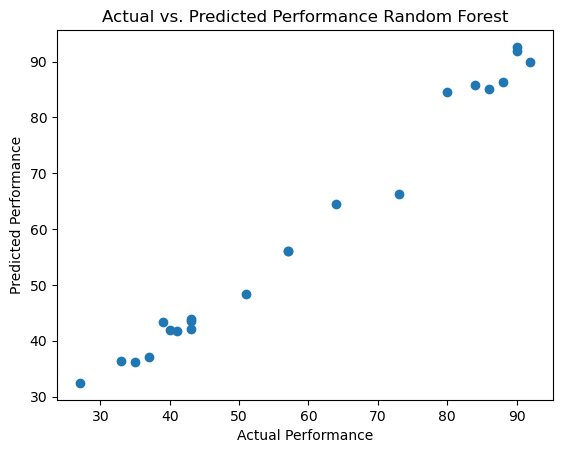

Random Forest Mean square error: 7.3602590909090955


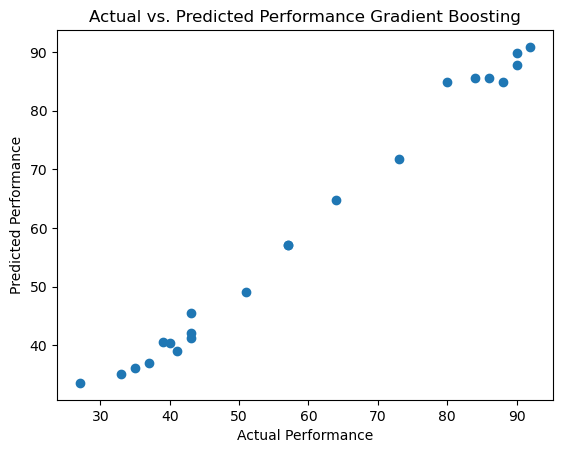

Gradient Boosting Mean square error: 5.21116635182389


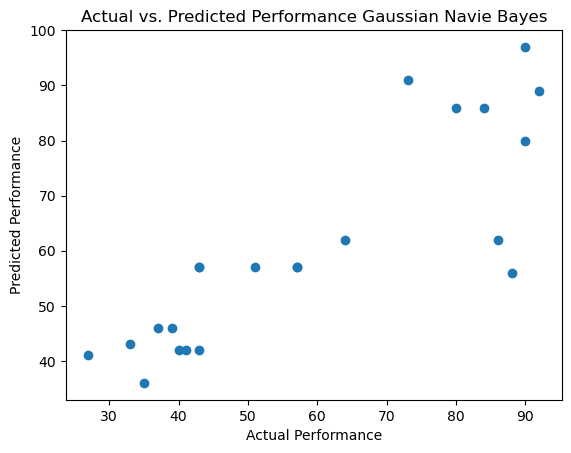

Gaussian Navie Bayes Mean square error: 135.77272727272728
Predicted Performance(Gradient Boosting): 68.89


In [ ]:
    
data = pd.read_csv("student_data.csv")
attendance = float(input("Enter attendance percentage: "))
health = int(input("Enter health value (0-2): "))
hobbies = int(input("Enter hobbies in hours: "))
extra_courses = int(input("Enter extra courses taken: "))
internal_marks = int(input("Enter internal marks out of 100: "))
previous_marks = int(input("Enter previous marks out of 100: "))
check=int(input("1:To Predict,2:To Train Model"))
if check==1:
    r_mse=random_forest(data)
    print("Random Forest Mean square error:",r_mse)
    gradient_mse=gradient_boosting(data)
    print("Gradient Boosting Mean square error:",gradient_mse)
    gaussian_mse=gaussian_navie_bayes(data)
    print("Gaussian Navie Bayes Mean square error:",gaussian_mse)
    if r_mse<gradient_mse and r_mse<gaussian_mse:
        random_forest_predict(data, attendance, health, hobbies, extra_courses, internal_marks, previous_marks)
    elif gradient_mse<r_mse and gradient_mse<gaussian_mse:
        gradient_boosting_predict(data, attendance, health, hobbies, extra_courses, internal_marks, previous_marks)
    else:
        gaussian_navie_bayes_predict(data,attendance, health, hobbies, extra_courses, internal_marks, previous_marks)
elif check==2:
    performance=int(input("Enter performance out of 100:"))
    add(attendance, health, hobbies, extra_courses, internal_marks, previous_marks,performance)
    r_mse=random_forest(data)
    print("Random Forest Mean square error:",r_mse)
    gradient_mse=gradient_boosting(data)
    print("Gradient Boosting Mean square error:",gradient_mse)
    gaussian_mse=gaussian_navie_bayes(data)
    print("Gaussian Navie Bayes Mean square error:",gaussian_mse)
else:
    print("Enter valid number")